# Abstract

The project aims to predict the future values of the stock market index for the Saudi Stock Exchange (TASI) using machine learning. Experiments are performed in 1–10, 15 and 30 days in advance. The project proposed approach involving Support Vector Regression (SVR). The project is based on a paper by Patel et.al. (2015) where he used machine learning techniques to predict two stock market indices CNX Nifty and S&P Bombay stock exchange. The project aims to predict the future values of the stock market index for the Saudi Stock Exchange (TASI) using machine learning. Experiments are performed in 1–10, 15 and 30 days in advance. The project proposed approach involving Support Vector Regression (SVR). The project is based on a paper by Patel et.al. (2015) where he used machine learning techniques to predict two stock market indices CNX Nifty and S&P Bombay stock exchange.

# Data

The dataset is from bloomberg. Initially, the data will be daily from 2010 until 2021 of TASI index since the Saudi stock market has changed in structure in the past 10 years. Predictor variables are taken from Patel et.al (2015) which are the following:

- Simple 10 days moving average.
- Weighted 10 days moving average.
- Momentum Stochastic K%
- Stochastic D%
- Relative strength index (RSI)
- Moving average convergence divergence (MACD)
- A/D (Accumulation/Distribution) oscillator
- CCI (commodity channel index).
- Average True Range (ATR)

In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression

%matplotlib inline
data = pd.read_csv('/Users/NoNo/Documents/My Documents/Tuwaiq Data Science Course/Project/Tasi10 Years Data with Studies.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3113 non-null   object 
 1   Close             3113 non-null   float64
 2   MA(10C)s          3113 non-null   float64
 3   MA(10C)w          3113 non-null   float64
 4   %K(141)           3113 non-null   float64
 5   %D(3)             3113 non-null   float64
 6   RSI(14C)          3113 non-null   float64
 7   MACDHist(12269C)  3106 non-null   float64
 8   MACD(12269C)      3113 non-null   float64
 9   MACDSig(12269C)   3106 non-null   float64
 10  AccDist           3113 non-null   float64
 11  CCI(20C)          3084 non-null   float64
 12  ATR(14)           3113 non-null   float64
dtypes: float64(12), object(1)
memory usage: 316.3+ KB


In [467]:
data.head()

Date     Close   MA(10C)s   MA(10C)w  %K(141)   %D(3)  RSI(14C)  \
0  11/08/2021  11846.53  11771.853  11773.453   66.916  56.816    61.821   
1  11/07/2021  11841.60  11776.184  11760.663   65.410  40.442    61.540   
2  11/04/2021  11752.23  11776.829  11748.886   38.122  30.711    56.105   
3  11/03/2021  11685.66  11795.564  11756.765   17.795  33.057    51.350   
4  11/02/2021  11752.12  11817.372  11780.713   36.216  42.636    57.083   

   MACDHist(12269C)  MACD(12269C)  MACDSig(12269C)       AccDist  CCI(20C)  \
0           -17.682        70.861           88.543  1.090000e+11    64.378   
1           -26.343        69.242           95.585  1.090000e+11    67.781   
2           -36.510        66.671          103.182  1.080000e+11     6.110   
3           -39.311        71.519          110.831  1.080000e+11   -34.421   
4           -34.453        83.444          117.898  1.080000e+11    14.025   

   ATR(14)  
0   99.998  
1   98.587  
2   99.167  
3   97.881  
4   95.314

# Features Description:
### Simple 10 days moving average:
This indicator calculate the closing prices of TASI for the last 10 days and divide the result by the number of days(10)
### Weighted 10 days moving average:
Is a technical indicator that traders use to generate trade direction and make a buy or sell decision. It assigns greater weighting to recent data points and less weighting on past data points. The WMA is calculated by multiplying each observation in the data set by a predetermined weighting factor.
### Momentum Stochastic K%:
Based on the lowest low and highest high of a given period, the %K line displays the last closing price as a percentage of this range.
### Stochastic D%:
This indicator represents a moving average of %K.
### Relative strength index (RSI):

### Moving average convergence divergence (MACD)
MACD is an indicator of trend-following momentum that shows the relationship between two price moving averages. The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
#### MACDHist:
This indicator determines the distance between MACD and its signal line (9-day MACD EMA). Like MACD, it fluctuates above and below zero.
#### MACDSig:
This indicator represents a signal to determan when to buy and when to sell.
### A/D (Accumulation/Distribution) oscillator:
Using volume and price, the accumulation/distribution indicator (A/D) calculates whether a stock is being accumulated or distributed.
### CCI (commodity channel index):
This indicator measures whether current prices are above or below the average over a certain period of time.
### Average True Range (ATR):
The indicator measures market volatility by decomposing the entire range of an asset price over a certain period of time.

In [468]:
data.shape

(3113, 13)

In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3113 non-null   object 
 1   Close             3113 non-null   float64
 2   MA(10C)s          3113 non-null   float64
 3   MA(10C)w          3113 non-null   float64
 4   %K(141)           3113 non-null   float64
 5   %D(3)             3113 non-null   float64
 6   RSI(14C)          3113 non-null   float64
 7   MACDHist(12269C)  3106 non-null   float64
 8   MACD(12269C)      3113 non-null   float64
 9   MACDSig(12269C)   3106 non-null   float64
 10  AccDist           3113 non-null   float64
 11  CCI(20C)          3084 non-null   float64
 12  ATR(14)           3113 non-null   float64
dtypes: float64(12), object(1)
memory usage: 316.3+ KB


# Clean Data
## Remove Rows:
I used this method due to my data needs older input to get 

In [470]:
df = data.dropna()
print(df.to_string())

            Date      Close   MA(10C)s   MA(10C)w   %K(141)     %D(3)   RSI(14C)  MACDHist(12269C)  MACD(12269C)  MACDSig(12269C)       AccDist  CCI(20C)   ATR(14)
0     11/08/2021  11846.530  11771.853  11773.453   66.9160   56.8160  61.821000          -17.6820       70.8610          88.5430  1.090000e+11   64.3780   99.9980
1     11/07/2021  11841.600  11776.184  11760.663   65.4100   40.4420  61.540000          -26.3430       69.2420          95.5850  1.090000e+11   67.7810   98.5870
2     11/04/2021  11752.230  11776.829  11748.886   38.1220   30.7110  56.105000          -36.5100       66.6710         103.1820  1.080000e+11    6.1100   99.1670
3     11/03/2021  11685.660  11795.564  11756.765   17.7950   33.0570  51.350000          -39.3110       71.5190         110.8310  1.080000e+11  -34.4210   97.8810
4     11/02/2021  11752.120  11817.372  11780.713   36.2160   42.6360  57.083000          -34.4530       83.4440         117.8980  1.080000e+11   14.0250   95.3140
5     11/01/2021

In [471]:
df.shape

(3084, 13)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3084 entries, 0 to 3083
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3084 non-null   object 
 1   Close             3084 non-null   float64
 2   MA(10C)s          3084 non-null   float64
 3   MA(10C)w          3084 non-null   float64
 4   %K(141)           3084 non-null   float64
 5   %D(3)             3084 non-null   float64
 6   RSI(14C)          3084 non-null   float64
 7   MACDHist(12269C)  3084 non-null   float64
 8   MACD(12269C)      3084 non-null   float64
 9   MACDSig(12269C)   3084 non-null   float64
 10  AccDist           3084 non-null   float64
 11  CCI(20C)          3084 non-null   float64
 12  ATR(14)           3084 non-null   float64
dtypes: float64(12), object(1)
memory usage: 337.3+ KB


In [473]:
df.head()

Date     Close   MA(10C)s   MA(10C)w  %K(141)   %D(3)  RSI(14C)  \
0  11/08/2021  11846.53  11771.853  11773.453   66.916  56.816    61.821   
1  11/07/2021  11841.60  11776.184  11760.663   65.410  40.442    61.540   
2  11/04/2021  11752.23  11776.829  11748.886   38.122  30.711    56.105   
3  11/03/2021  11685.66  11795.564  11756.765   17.795  33.057    51.350   
4  11/02/2021  11752.12  11817.372  11780.713   36.216  42.636    57.083   

   MACDHist(12269C)  MACD(12269C)  MACDSig(12269C)       AccDist  CCI(20C)  \
0           -17.682        70.861           88.543  1.090000e+11    64.378   
1           -26.343        69.242           95.585  1.090000e+11    67.781   
2           -36.510        66.671          103.182  1.080000e+11     6.110   
3           -39.311        71.519          110.831  1.080000e+11   -34.421   
4           -34.453        83.444          117.898  1.080000e+11    14.025   

   ATR(14)  
0   99.998  
1   98.587  
2   99.167  
3   97.881  
4   95.314

In [474]:
print(df)

            Date     Close   MA(10C)s   MA(10C)w  %K(141)   %D(3)  RSI(14C)  \
0     11/08/2021  11846.53  11771.853  11773.453   66.916  56.816    61.821   
1     11/07/2021  11841.60  11776.184  11760.663   65.410  40.442    61.540   
2     11/04/2021  11752.23  11776.829  11748.886   38.122  30.711    56.105   
3     11/03/2021  11685.66  11795.564  11756.765   17.795  33.057    51.350   
4     11/02/2021  11752.12  11817.372  11780.713   36.216  42.636    57.083   
...          ...       ...        ...        ...      ...     ...       ...   
3079    05/31/09   5893.34   5955.075   5917.493   39.936  34.763    56.064   
3080    05/30/09   5933.54   5959.895   5929.594   49.729  24.825    58.219   
3081    05/27/09   5789.43   5953.698   5933.259   14.623  21.859    52.090   
3082    05/26/09   5770.95   5979.233   5967.769   10.121  43.450    51.238   
3083    05/25/09   5914.23   6003.904   6010.124   40.834  72.437    58.759   

      MACDHist(12269C)  MACD(12269C)  MACDSig(12269

In [475]:
df.tail

<bound method NDFrame.tail of             Date     Close   MA(10C)s   MA(10C)w  %K(141)   %D(3)  RSI(14C)  \
0     11/08/2021  11846.53  11771.853  11773.453   66.916  56.816    61.821   
1     11/07/2021  11841.60  11776.184  11760.663   65.410  40.442    61.540   
2     11/04/2021  11752.23  11776.829  11748.886   38.122  30.711    56.105   
3     11/03/2021  11685.66  11795.564  11756.765   17.795  33.057    51.350   
4     11/02/2021  11752.12  11817.372  11780.713   36.216  42.636    57.083   
...          ...       ...        ...        ...      ...     ...       ...   
3079    05/31/09   5893.34   5955.075   5917.493   39.936  34.763    56.064   
3080    05/30/09   5933.54   5959.895   5929.594   49.729  24.825    58.219   
3081    05/27/09   5789.43   5953.698   5933.259   14.623  21.859    52.090   
3082    05/26/09   5770.95   5979.233   5967.769   10.121  43.450    51.238   
3083    05/25/09   5914.23   6003.904   6010.124   40.834  72.437    58.759   

      MACDHist(12269C

# Visualisation

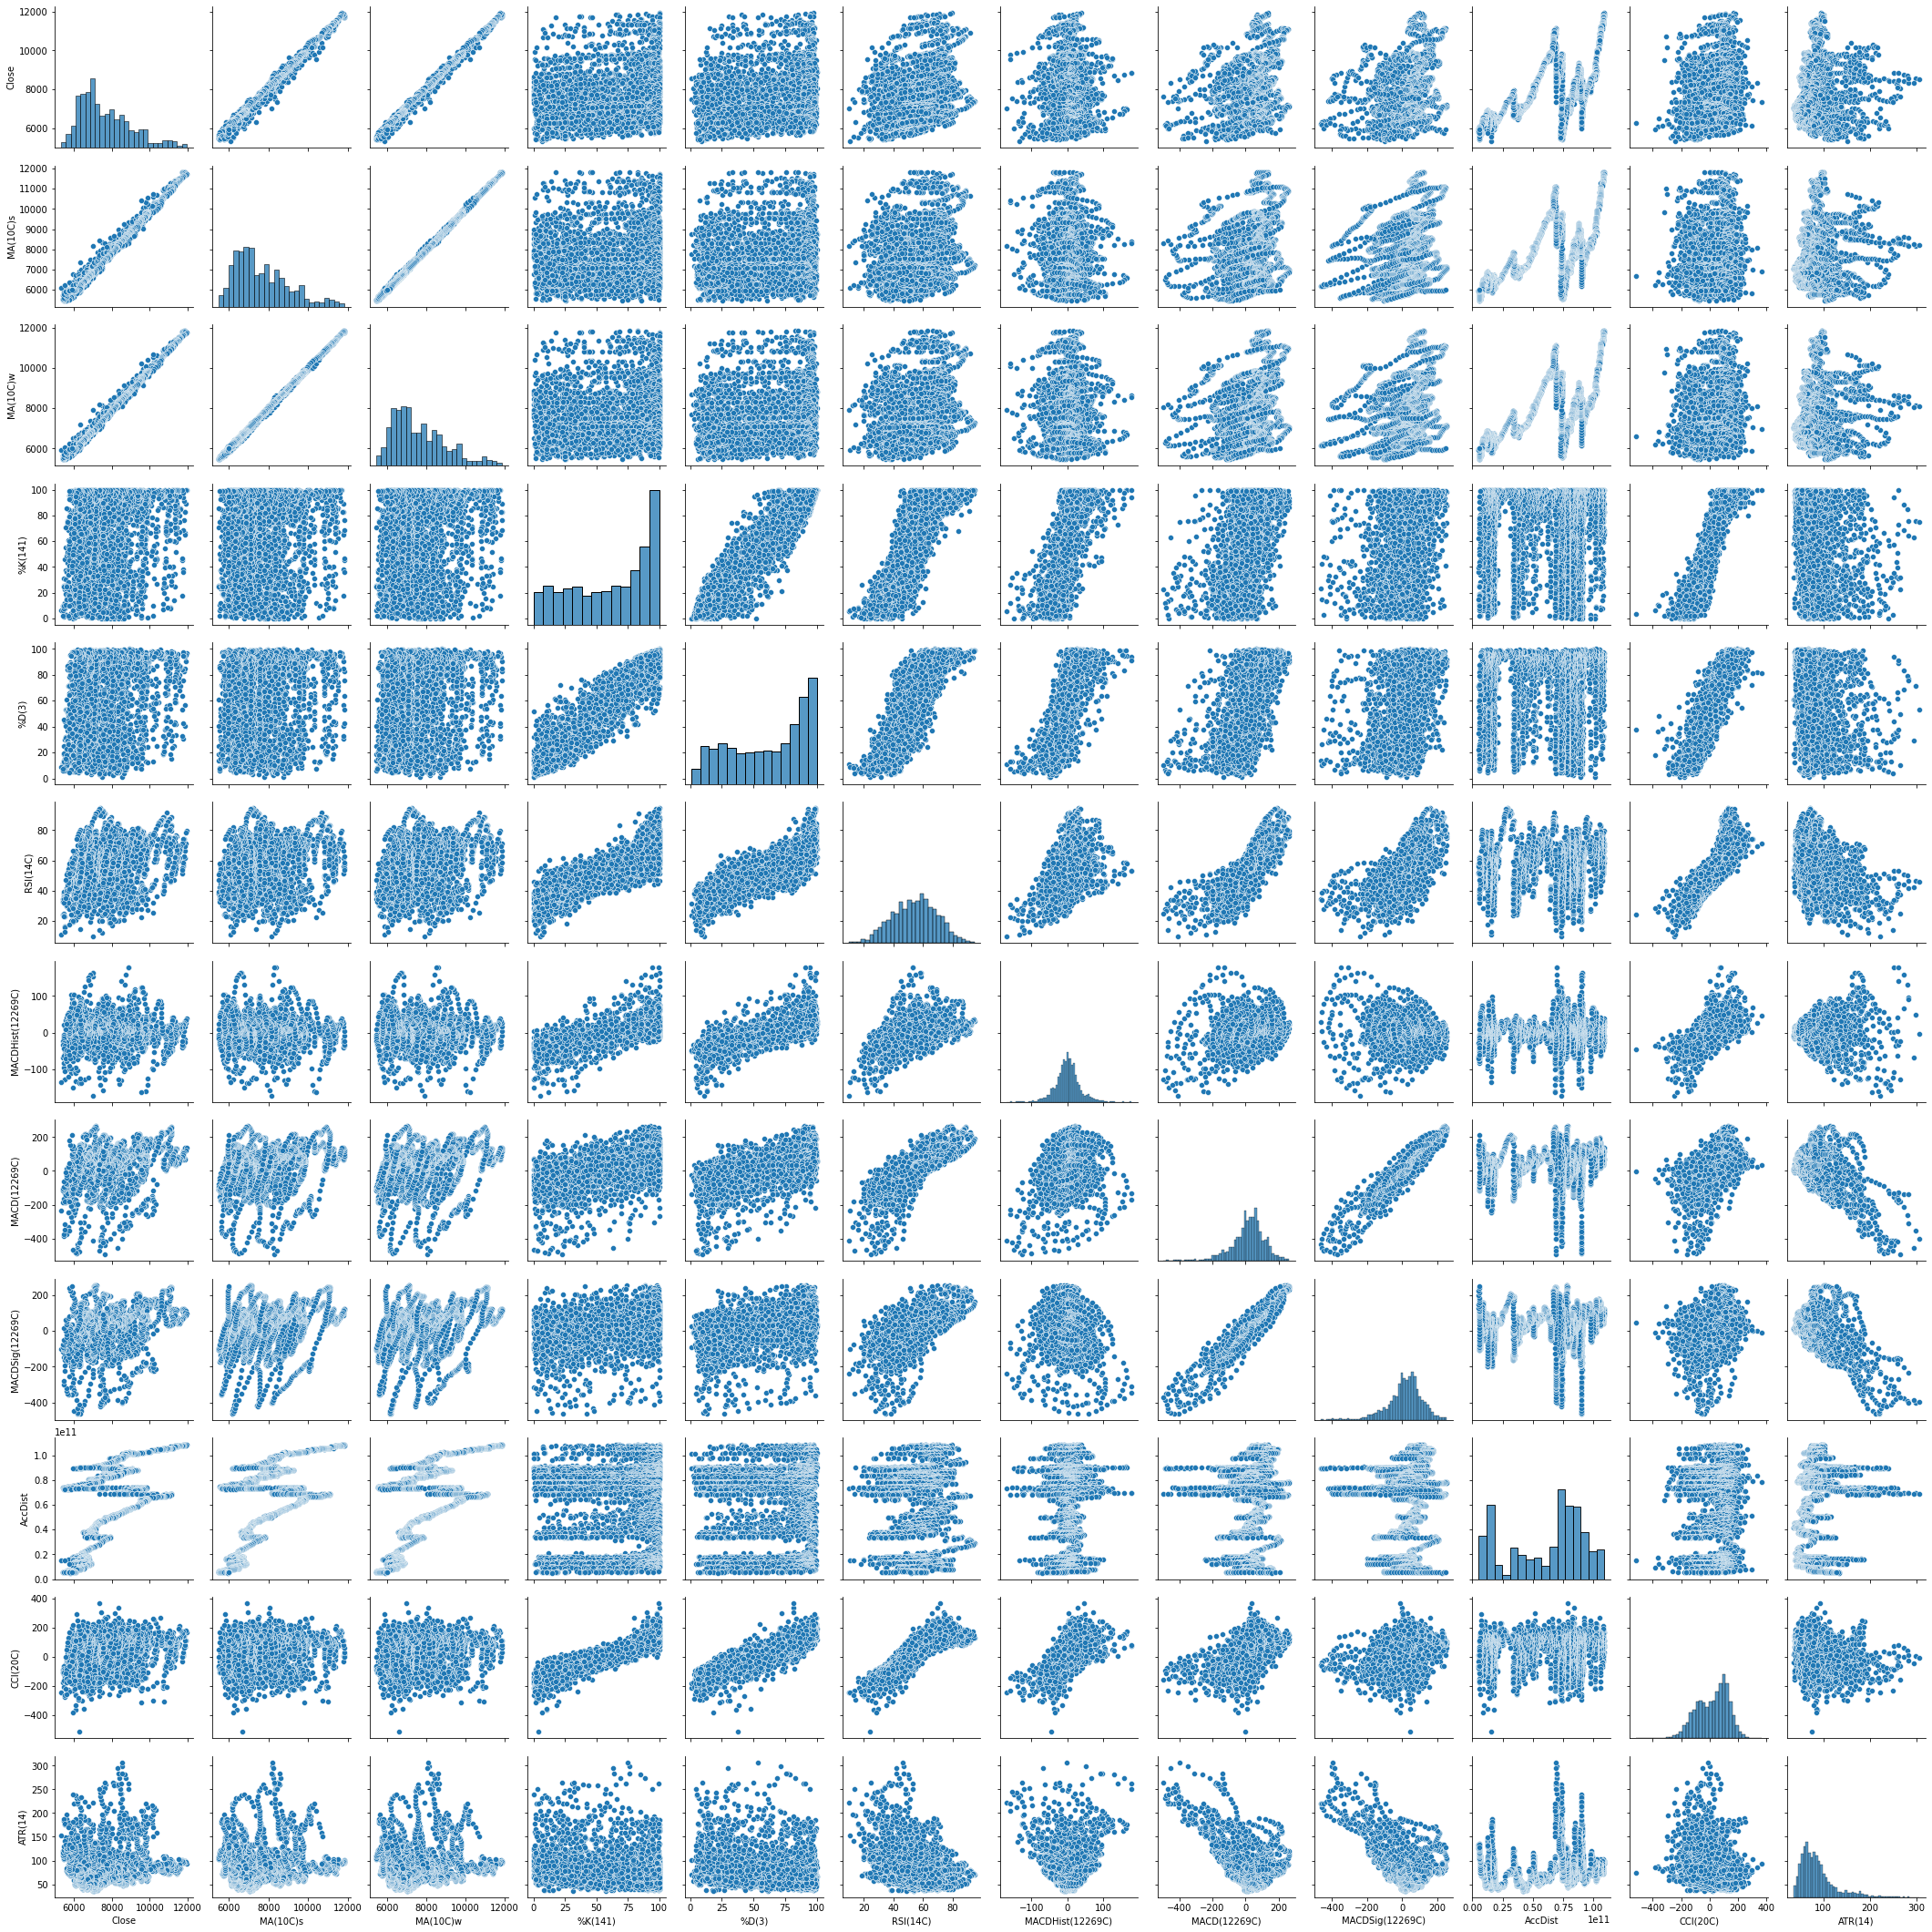

In [476]:
sns.pairplot(df)

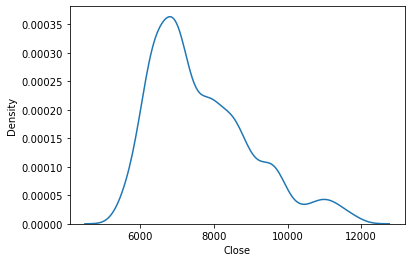

In [477]:
sns.kdeplot(df['Close']);

<AxesSubplot:>

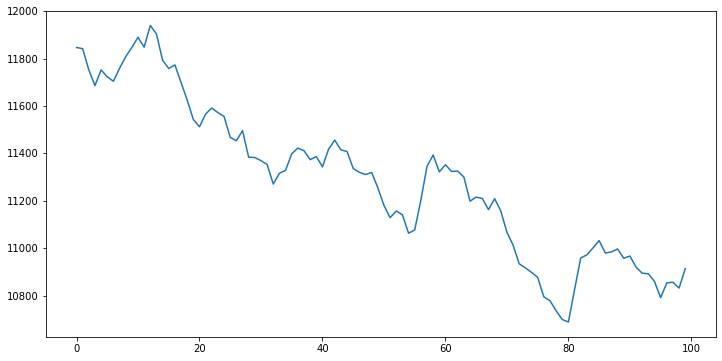

In [478]:
df['Close'][:100].plot(figsize=(12,6))

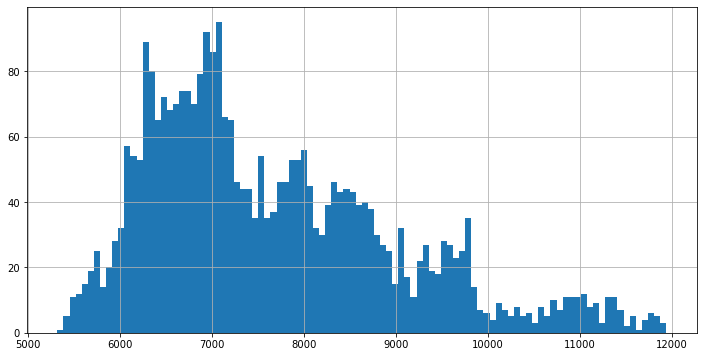

In [479]:
df['Close'].hist(bins=100, figsize=(12,6));

Text(0.5, 1.0, 'MACD Sig')

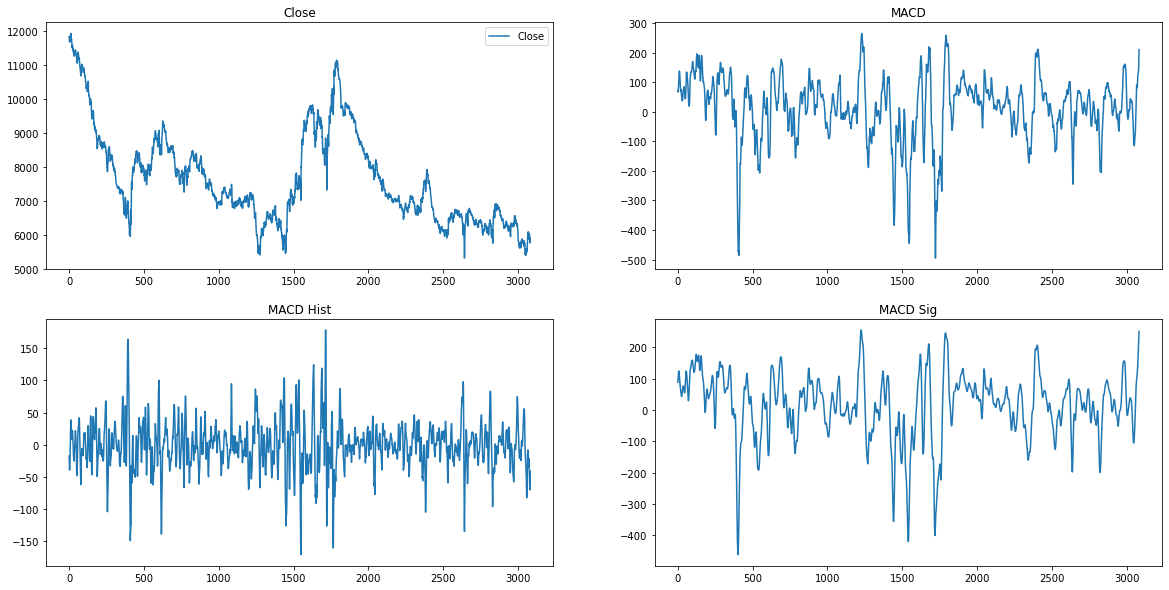

In [480]:
fig, axes = mpt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)


close=df[['Date','Close']].plot(ax=axes[0,0])
axes[0,0].set_title('Close')
MACD=df['MACD(12269C)'].plot(ax=axes[0,1])
axes[0,1].set_title('MACD')
MACDHist=df['MACDHist(12269C)'].plot(ax=axes[1,0])
axes[1,0].set_title('MACD Hist')
MACDSig=df['MACDSig(12269C)'].plot(ax=axes[1,1])
axes[1,1].set_title('MACD Sig')

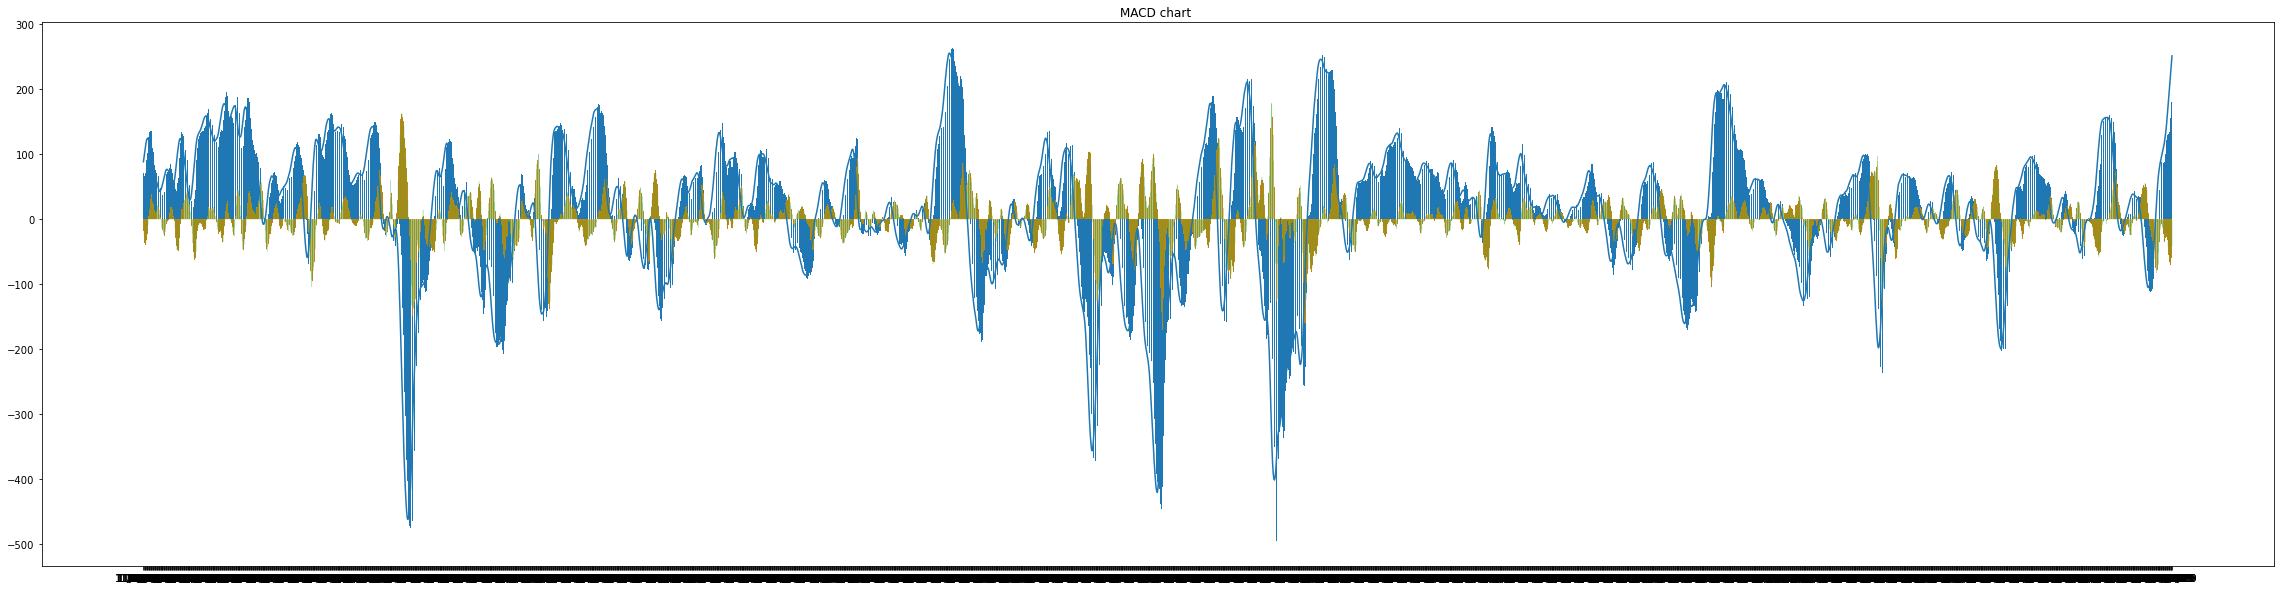

In [481]:
mpt.figure(figsize=(40,10))
mpt.title('MACD chart ')
mpt.bar(df['Date'], df['MACD(12269C)'].fillna(0))
mpt.plot(df['Date'], df['MACDSig(12269C)'].fillna(0))
mpt.bar(df['Date'], df['MACDHist(12269C)'].fillna(0))
mpt.bar(df['Date'], df['MACDHist(12269C)'].fillna(0), width=0.5, snap=False)

mpt.show()

# Correlations

In [482]:
from datetime import datetime
df['Date'] = [float(str(i).replace("/", "")) for i in df['Date']]
#date = "11/26/11".replace("/", "")
#dt = '05/06/2021 10/23/16 12/24/17'
#date = dt.split()[0].replace('/','')
#fl = float(date)

<ipython-input-482-f39c7b29fdd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = [float(str(i).replace("/", "")) for i in df['Date']]


In [483]:
#Try to find the best correlations
#First I choess the below virabals, however, I found Ma(10C)s and MA(10C)W doing the same effict no new information
corr=df[['MA(10C)s','MA(10C)w','%K(141)','%D(3)','RSI(14C)','MACD(12269C)','AccDist','CCI(20C)','ATR(14)']].corr()

<AxesSubplot:>

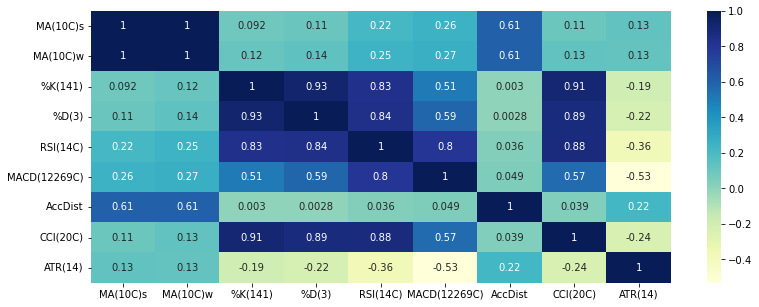

In [484]:
mpt.figure(figsize=[13,5])
corr = df[['MA(10C)s','MA(10C)w','%K(141)','%D(3)','RSI(14C)','MACD(12269C)','AccDist','CCI(20C)','ATR(14)']].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [485]:
# There's no correlation here.
corr1=df[['MA(10C)s','%K(141)','%D(3)','RSI(14C)','MACD(12269C)','AccDist','CCI(20C)','ATR(14)']].corr()

<AxesSubplot:>

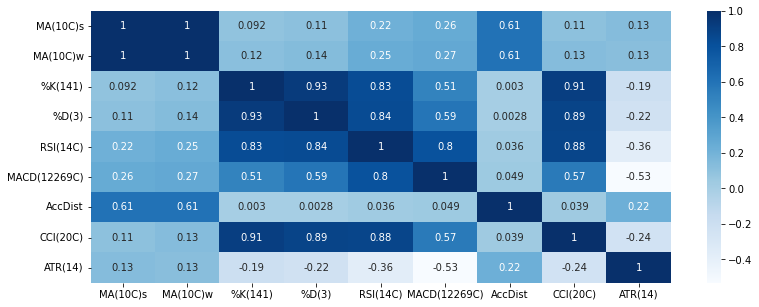

In [486]:
mpt.figure(figsize=[13,5])
corr1 = df[['MA(10C)s','%K(141)','%D(3)','RSI(14C)','MACD(12269C)','AccDist','CCI(20C)','ATR(14)']].corr()
sns.heatmap(corr, cmap="Blues", annot=True)

# Modeling & Testing

## Linear Regression

In [488]:
df.shape

(3084, 13)

In [489]:
lr = LinearRegression()
# Choose the predictor variables
X = df[['MA(10C)s','%K(141)','%D(3)','RSI(14C)','MACD(12269C)','AccDist','CCI(20C)','ATR(14)']]
# Choose the response variable
y = df['Close']
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X, y)
# adjusted_r_squared = 1 

0.9959888375283464

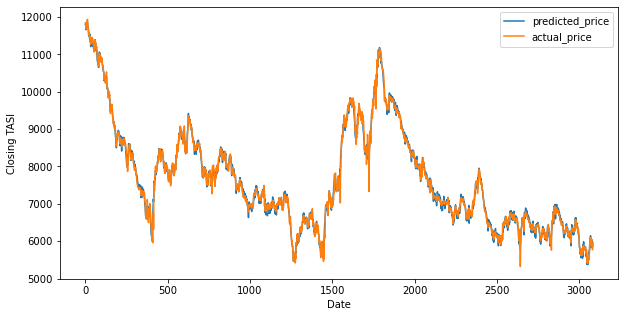

In [490]:
predicted_price = lr.predict(X)  
predicted_price = pd.DataFrame(predicted_price,index=y.index,columns = ['Close'])  
predicted_price.plot(figsize=(10,5))
mpt.xlabel('Date')
y.plot()  
mpt.legend(['predicted_price','actual_price'])  
mpt.ylabel("Closing TASI")  
mpt.show()

## SVM

In [491]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [492]:
# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [500]:
#Create one more column Prediction shifted 15 days up.
df['Prediction'] = df[['Close']].shift(-15)
#print data set
print(df)

            Date     Close   MA(10C)s   MA(10C)w  %K(141)   %D(3)  RSI(14C)  \
0     11082021.0  11846.53  11771.853  11773.453   66.916  56.816    61.821   
1     11072021.0  11841.60  11776.184  11760.663   65.410  40.442    61.540   
2     11042021.0  11752.23  11776.829  11748.886   38.122  30.711    56.105   
3     11032021.0  11685.66  11795.564  11756.765   17.795  33.057    51.350   
4     11022021.0  11752.12  11817.372  11780.713   36.216  42.636    57.083   
...          ...       ...        ...        ...      ...     ...       ...   
3079     53109.0   5893.34   5955.075   5917.493   39.936  34.763    56.064   
3080     53009.0   5933.54   5959.895   5929.594   49.729  24.825    58.219   
3081     52709.0   5789.43   5953.698   5933.259   14.623  21.859    52.090   
3082     52609.0   5770.95   5979.233   5967.769   10.121  43.450    51.238   
3083     52509.0   5914.23   6003.904   6010.124   40.834  72.437    58.759   

      MACDHist(12269C)  MACD(12269C)  MACDSig(12269

<ipython-input-500-c476a283f31c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-15)


In [501]:
#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(df.drop(['Prediction'],1))
#Remove the last 15 rows
X = X[:-15]
print(X)

[[1.10820210e+07 1.18465300e+04 1.17718530e+04 ... 1.09000000e+11
  6.43780000e+01 9.99980000e+01]
 [1.10720210e+07 1.18416000e+04 1.17761840e+04 ... 1.09000000e+11
  6.77810000e+01 9.85870000e+01]
 [1.10420210e+07 1.17522300e+04 1.17768290e+04 ... 1.08000000e+11
  6.11000000e+00 9.91670000e+01]
 ...
 [6.17090000e+04 5.99030000e+03 5.99915800e+03 ... 5.78398486e+09
  1.13730000e+01 1.13685000e+02]
 [6.16090000e+04 6.06235000e+03 6.00501500e+03 ... 5.96871288e+09
  6.61070000e+01 1.15544000e+02]
 [6.15090000e+04 6.04977000e+03 6.00192600e+03 ... 5.68303944e+09
  5.60050000e+01 1.16816000e+02]]


In [503]:
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df['Prediction'])
# Remove Last 15 rows
y = y[:-15]
print(y)

[11758.02 11773.36 11699.11 ...  5789.43  5770.95  5914.23]


In [496]:
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Train the model 
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [497]:
# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  -0.08387242459772026


In [504]:
forecast = np.array(df.drop(['Prediction'],1))[-15:]
print(forecast)

[[ 6.14090000e+04  6.09945000e+03  5.99727400e+03  6.00029100e+03
   9.05760000e+01  7.89940000e+01  6.17450000e+01 -1.38780000e+01
   9.14600000e+01  1.05339000e+02  5.76693622e+09  1.01841000e+02
   1.19893000e+02]
 [ 6.13090000e+04  6.09491000e+03  5.97666300e+03  5.97796600e+03
   9.48120000e+01  6.11720000e+01  6.15630000e+01 -2.24900000e+01
   8.73010000e+01  1.09792000e+02  5.89602359e+09  1.09559000e+02
   1.24615000e+02]
 [ 6.10200900e+06  5.94120000e+03  5.96052600e+03  5.95353200e+03
   5.15950000e+01  4.16340000e+01  5.47920000e+01 -3.37810000e+01
   8.11850000e+01  1.14967000e+02  5.58334689e+09 -1.40390000e+01
   1.22177000e+02]
 [ 6.09200900e+06  5.88174000e+03  5.94534900e+03  5.95428700e+03
   3.71100000e+01  4.71650000e+01  5.17380000e+01 -3.43310000e+01
   8.78480000e+01  1.22180000e+02  5.47740600e+09 -6.82960000e+01
   1.24639000e+02]
 [ 6.08200900e+06  5.87799000e+03  5.93427000e+03  5.96383800e+03
   3.61970000e+01  5.55140000e+01  5.15460000e+01 -2.85670000e+01


In [506]:
# support vector model predictions for the next ‘15’ days
svm_prediction = svr.predict(forecast)
print(svm_prediction)

ValueError: X.shape[1] = 13 should be equal to 8, the number of features at training time

# Recomndation 